In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#importing the csv file to create models.
music_df = pd.read_csv('data.csv',index_col=['id','name'])
music_df.head()

,,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
id,name,,,,,,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,1928,0.0506,118.469,0.7790,1928
6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento",0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,1928,0.0462,83.972,0.0767,1928
6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,1928,0.9290,107.177,0.8800,1928
6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,1928-09-25,0.0926,108.003,0.7200,1928
6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,1928,0.0424,62.149,0.0693,1928


In [3]:
music_df = music_df.drop(columns=['artists','release_date'])
music_df.head()

,,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
id,name,,,,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento",0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928


In [4]:
music_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [5]:
kmeans=KMeans(num_cluster)#creating cluster defenition to call back when running kmeans
kmeans.fit(music_df.values)


KMeans()

In [6]:
centers = kmeans.cluster_centers_

In [7]:
centers

array([[ 6.23710065e-01,  5.35591328e-01,  1.18266542e+05,
         3.97147505e-01,  1.18509540e-01,  2.02924559e-01,
         5.18548639e+00,  2.22770182e-01, -1.39619152e+01,
         7.42414764e-01,  2.12614561e+01,  1.67983328e-01,
         1.15387131e+02,  5.77240012e-01,  1.96516969e+03],
       [ 3.96768914e-01,  5.19206371e-01,  3.32312281e+05,
         5.26062925e-01,  7.69563130e-02,  1.78223030e-01,
         5.16898704e+00,  2.14886102e-01, -1.13459591e+01,
         6.57177148e-01,  3.55061450e+01,  8.25954009e-02,
         1.16649135e+02,  4.63513453e-01,  1.98231445e+03],
       [ 6.82399203e-01,  3.67888761e-01,  7.48413709e+05,
         3.32343516e-01,  1.57099698e-02,  4.46399708e-01,
         5.18126888e+00,  2.48934985e-01, -1.56447692e+01,
         6.53172205e-01,  1.70936556e+01,  1.07325680e-01,
         1.06840115e+02,  2.91130465e-01,  1.96132749e+03],
       [ 5.36188231e-01,  4.37765376e-01,  4.81255196e+05,
         4.30649666e-01,  2.34128771e-02,  3.29931610

In [8]:
def elbow_plot(df, num_clusters_test=10):
  """Create an elbow plot of KMeans Clustering data."""
  label_predictions = []
  for num in range(1, num_clusters_test+1):
    model = KMeans(num)
    model.fit(df)
    label_predictions.append(model.inertia_)
    print(num)
  plt.title('Cluster Variance')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Sum of Squared Distances')
  plt.plot(range(1, num_clusters_test+1), label_predictions, 'rx-')
  plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


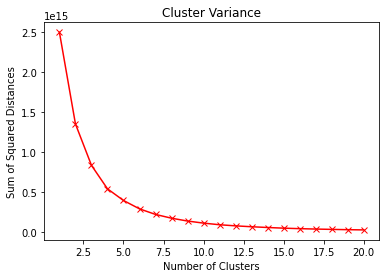

In [9]:
elbow_plot(music_df, 20)

In [10]:
def scree_plot(pca):
  num_length=len(pca.explained_variance_ratio_) #define how many components out
  ind = np.arange(num_length) #taging the spot of each value to assign the component to
  vals= pca.explained_variance_ratio_ #the total variance of the pca

  plt.figure(figsize=(18,6))
  ax = plt.subplot(111)
  cumval = np.cumsum(vals) #add up all the variance of the proceeding pcas till that point
  ax.bar(ind,vals)
  ax.plot(ind, cumval)
  for i in range(num_length):
    ax.annotate(r'%s' % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va='bottom',ha='center',fontsize=7)

  ax.xaxis.set_tick_params(width=0)
  ax.yaxis.set_tick_params(width=2, length=12)
  plt.xlim(0,10)
 
  ax.set_xlabel("Principal Component")
  ax.set_ylabel("Variance Explained (%)")
  plt.title('Explained Variance Per Principal Component')

In [11]:
music_scale = StandardScaler().fit_transform(music_df)

In [12]:
pca=PCA(.9)

In [13]:
pca_fit= pca.fit_transform(music_scale)

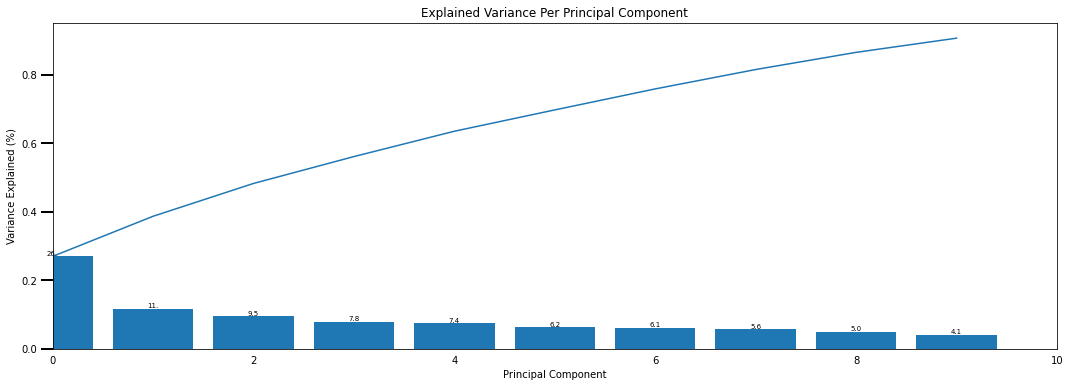

In [14]:
scree_plot(pca)